# Investigating unadjusted p-values from 625ppm vs 1500ppm eQTL analysis

__Author:__ Bryan Quach  
__Date:__ May 01, 2017

### Estimated Analysis Time: <1 days

## Objective

There are multiple objectives of this analysis. Generally, the goal is to get a sense for expected results once multiple testing correction has been applied to the initial results. In a sense, we can consider the observations from this analysis as pre-liminary results. This analysis will address the following questions:

* How many total comparisons were done?
* How many genes were tested? How many markers were tested?
* What is the distribution of markers tested per gene?
* What is the p-value distribution of our results?
* Which gene and marker comparisons produced the most significant hits?

It is important to note that this analysis is for eQTL analysis results that used DESeq2 normalized (median ratio normalization) TPM values for lowly expressed gene filtering and for the expression phenotype.

## Software required

* [dplyr (R package)](https://cran.r-project.org/web/packages/dplyr/index.html)

## The Data

The data that we work with are results output from running a modified version of Daniel Oreper's eQTL analysis software. This software produces an R data file containing the environment in which the analysis was run, which includes a matrix of p-values with rows and columns corresponding to genes and markers respectively. In this analysis, we will look at results for the eQTL analyses in lung, liver, and kidney. The phenotype was the fold change in normalized expression between 1500ppm and 625ppm BD treated CC mice.

## Calculating analysis statistics

### Lung

In [1]:
load("data/625ppm_vs_1500ppm_lung.Rdata")

#Calculate total number of comparisons
total.runs.lung <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.lung <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.lung <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.lung <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.lung <- na.omit(as.numeric(unlist(out.mat)))

### Liver

In [2]:
load("data/625ppm_vs_1500ppm_liver.Rdata")

#Calculate total number of comparisons
total.runs.liver <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.liver <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.liver <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.liver <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.liver <- na.omit(as.numeric(unlist(out.mat)))

### Kidney

In [3]:
load("data/625ppm_vs_1500ppm_kidney.Rdata")

#Calculate total number of comparisons
total.runs.kidney <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.kidney <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.kidney <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.kidney <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.kidney <- na.omit(as.numeric(unlist(out.mat)))

## Plotting statistics

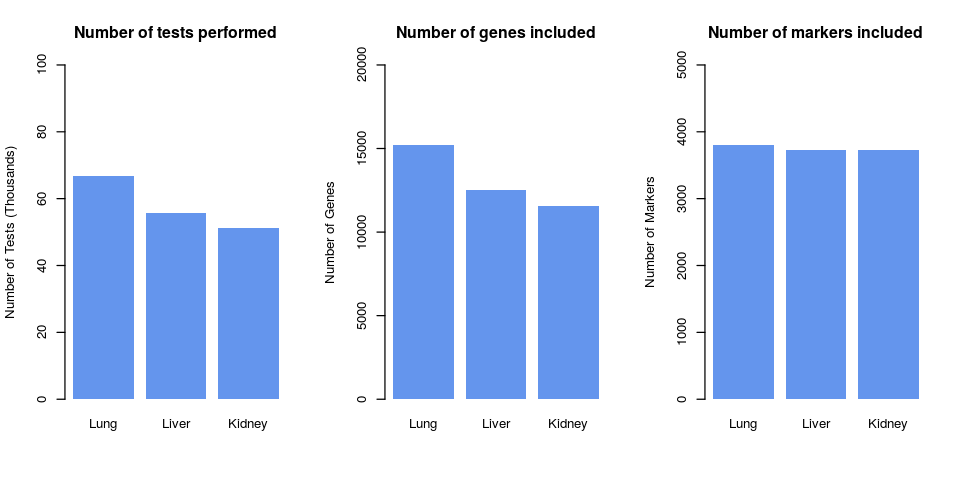

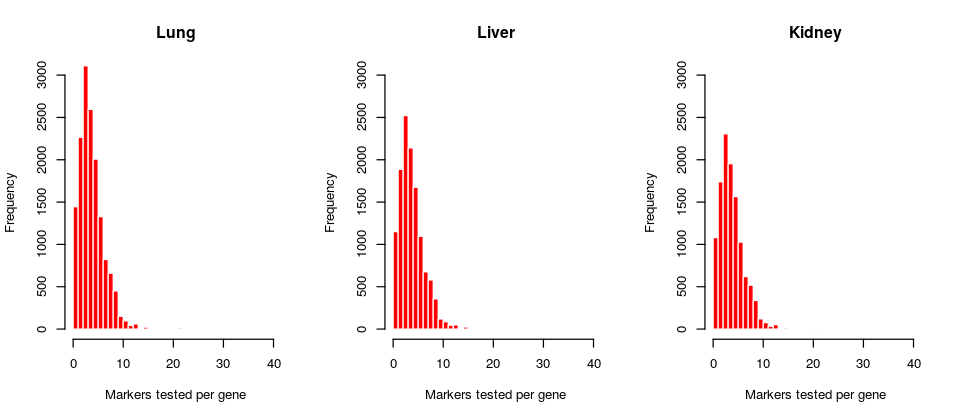

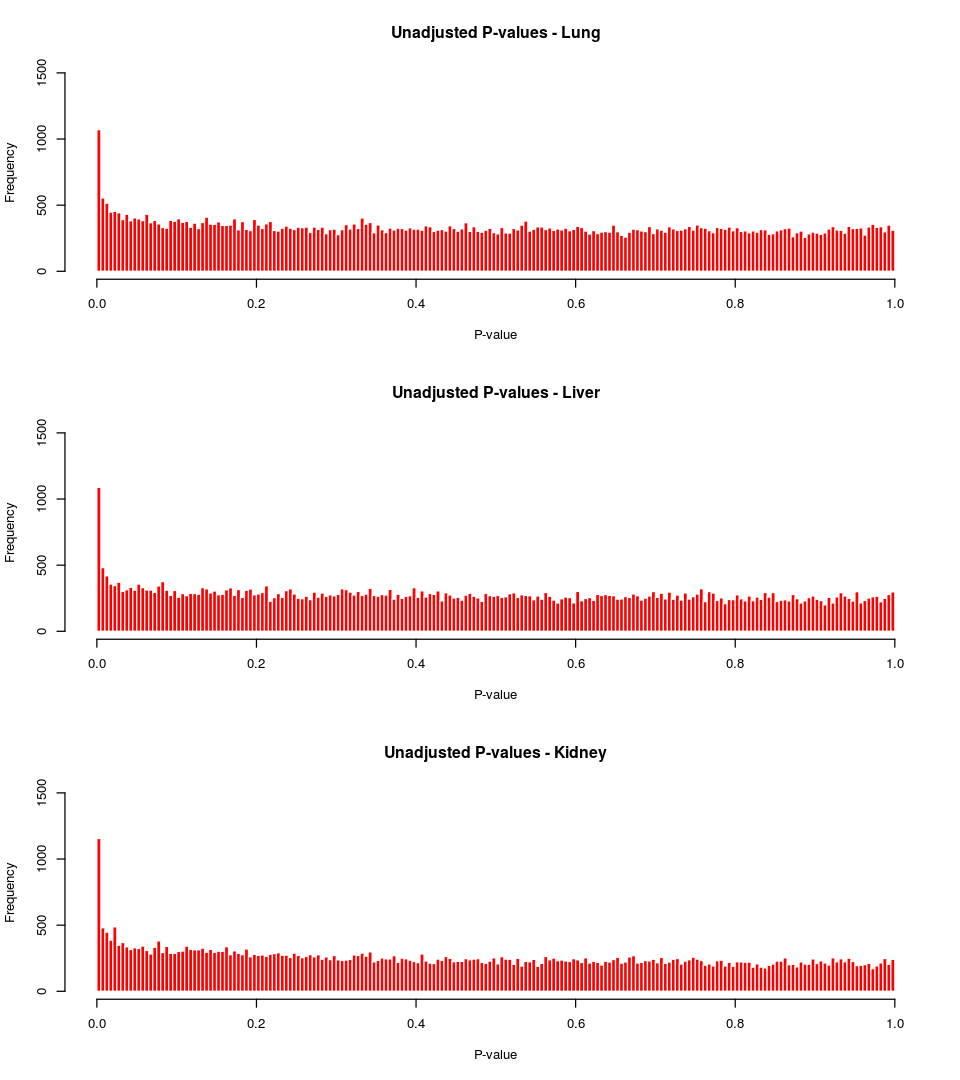

In [4]:
library(repr)
options(repr.plot.width=8, repr.plot.height=4)

total.runs <- c(total.runs.lung, total.runs.liver, total.runs.kidney)
num.genes.tested <- c(num.genes.tested.lung, num.genes.tested.liver, num.genes.tested.kidney)
num.markers.tested <- c(num.markers.tested.lung, num.markers.tested.liver, num.markers.tested.kidney)

#Number of tests, genes, and markers
par(mfrow=c(1,3))
barplot(height=total.runs/1000, beside=T, ylab="Number of Tests (Thousands)", ylim=c(0,100),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of tests performed")
barplot(height=num.genes.tested, beside=T, ylab="Number of Genes", ylim=c(0,20000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of genes included")
barplot(height=num.markers.tested, beside=T, ylab="Number of Markers", ylim=c(0,5000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of markers included")

#Markers per gene
options(repr.plot.width=8, repr.plot.height=3.5)
par(mfrow=c(1,3))
hist(m.per.gene.lung, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Lung",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.liver, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Liver",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.kidney, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Kidney",
     ylab="Frequency", 
     xlab="Markers tested per gene")

#P-value distributions
options(repr.plot.width=8, repr.plot.height=9)
par(mfrow=c(3,1))
hist(pvals.lung, breaks=200, freq=T, ylim=c(0,1500), 
     col="red", border="white",
     main="Unadjusted P-values - Lung",
     ylab="Frequency",
     xlab="P-value")
hist(pvals.liver, breaks=200, freq=T, ylim=c(0,1500), 
     col="red", border="white",
     main="Unadjusted P-values - Liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney, breaks=200, freq=T, ylim=c(0,1500), 
     col="red", border="white",
     main="Unadjusted P-values - Kidney",
     ylab="Frequency", 
     xlab="P-value")

par(mfrow=c(3,1))
hist(pvals.lung[which(pvals.lung < 0.01)], breaks=200, freq=T, ylim=c(0,300), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - lung",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.liver[which(pvals.liver < 0.01)], breaks=200, freq=T, ylim=c(0,300), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney[which(pvals.kidney < 0.01)], breaks=200, freq=T, ylim=c(0,300), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - Kidney",
     ylab="Frequency", 
     xlab="P-value")


## Retrieving most significant tests

For each tissue, we retrieve the 100 gene-marker pairs that produced the most significant p-values and list them below.

In [5]:
library(dplyr)

# Function for searching p-value matrix
#
# Args:
#   needle - value to find
#   haystack - matrix to search through
#
# Returns a dataframe of the p-values with gene and marker names listed
find.value <- function(needle, haystack){
    hits <- which(haystack==needle, arr.ind=T)
    rnames <- rownames(haystack)[hits[,1]]
    cnames <- colnames(haystack)[hits[,2]]
    results <- c()
    for(i in 1:nrow(hits)){
        record <- c(rnames[i], cnames[i], needle)
        results <- rbind(results, record)
    }
    return(data.frame(results))
}

#Get p-value matrices for each tissue
load("data/625ppm_vs_1500ppm_lung.Rdata")
matrix.lung <- out.mat
load("data/625ppm_vs_1500ppm_liver.Rdata")
matrix.liver <- out.mat
load("data/625ppm_vs_1500ppm_kidney.Rdata")
matrix.kidney <- out.mat


#Get top 100 p-values per tissue
top.lung <- sort(pvals.lung)[1:100]
top.liver <- sort(pvals.liver)[1:100]
top.kidney <- sort(pvals.kidney)[1:100]

#Create gene and marker list for significant hits
lung.list <- bind_rows(lapply(top.lung, function(x){find.value(x, matrix.lung)}))
liver.list <- bind_rows(lapply(top.liver, function(x){find.value(x, matrix.liver)}))
kidney.list <- bind_rows(lapply(top.kidney, function(x){find.value(x, matrix.kidney)}))
colnames(lung.list) <- c("Gene", "Marker", "P-value")
colnames(liver.list) <- c("Gene", "Marker", "P-value")
colnames(kidney.list) <- c("Gene", "Marker", "P-value")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”

In [6]:
#Display tables
cat("Lung\n")
lung.list
cat("Liver\n")
liver.list
cat("Kidney\n")
kidney.list

#Write tables to file
write.table(x=lung.list, file="results/lung_top100_hits_unadjusted_pvals_625_vs_1500.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=liver.list, file="results/liver_top100_hits_unadjusted_pvals_625_vs_1500.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=kidney.list, file="results/kidney_top100_hits_unadjusted_pvals_625_vs_1500.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")

Lung


Gene          Marker                        P-value             
1   Glipr2        UNC7134471.UNC7149801         8.31436830918455e-65
2   Glipr2        UNC041043835.JAX00549124      1.16023737109987e-64
3   Glipr2        UNC7150041.UNC040499102       1.23354703025095e-64
4   Gm7257        UNC16155218.UNC16176492       8.69086490787499e-52
5   Gm7257        UNC16154532.UNC16154532       8.69086495317261e-52
6   Gm7257        UNC16154850.UNC16154850       8.69086495332118e-52
7   Gm7257        JAX00169998.JAX00169998       8.6908649537543e-52 
8   Gm7257        UNC16151938.UNC16154080       8.69096944962537e-52
9   Gm6812        UNC30902191.UNC30940542       1.10493594923959e-39
10  Mir7035       UNC10247043.UNC10251963       2.79443031357774e-35
11  Gm1140        UNC30902191.UNC30940542       5.80461616328245e-30
12  Dhcr24        JAX00122955.UNC7931463        2.10200078450048e-28
13  Dhcr24        JAX00561354.JAX00561354       2.30194454242061e-28
14  Dhcr24        UNC7932936.UNC7947729         2.81249994382737e-28
15  Dhcr24        UNC7905375.UNC040215368       3.91138837240333e-28
16  Dhcr24        UNC7913411.UNC7928876         4.72448212860755e-28
17  Tnfaip2       UNC21894871.UNC21910865       3.11142108027023e-26
18  Baat          UNC7220972.UNC7228380         9.87676927232569e-26
19  Lactb2        UNC119817.UNC123662           8.94731970770875e-24
20  Lactb2        UNC130265.UNC134669           1.99551162074195e-23
21  Lactb2        JAX00242146.UNC129874         3.51691028543852e-23
22  Tctex1d1      UNC7873851.UNC7888795         7.97745358482428e-22
23  Tctex1d1      UNC7859499.UNC7873155         1.26035960167712e-21
24  Tctex1d1      JAX00559819.UNC7858732        1.2743575155005e-21 
25  Mmp17         UNC051739102.UNC10159778      5.53726731828881e-18
26  Olfr889       UNC16155218.UNC16176492       5.90697865307335e-18
27  Olfr889       UNC16190786.JAX00691103       6.56299469181882e-18
28  Olfr889       UNC16177202.UNC16189957       6.9351579463073e-18 
29  Hook1         UNC7778493.UNC7800092         1.391109254807e-17  
30  Mir6971       UNC27787139.UNC27801007       2.46269549810337e-17
⋮   ⋮             ⋮                             ⋮                   
71  Edn2          UNC8089729.UNC8093800         9.27494454856518e-09
72  Nlrp12        UNC12370256.UNC12372829       9.55423743431615e-09
73  Nlrp12        UNC070002187.JAX00190001      1.02329997234919e-08
74  Nlrp12        UNC12373496.UNC12373496       1.02330091579851e-08
75  Hipk4         UNC12537732.UNC12538865       1.16060450133119e-08
76  Lonrf2        UNC495144.UNC506607           1.27980536122869e-08
77  Hipk4         UNC12532252.JAX00633908       1.42785140582682e-08
78  Lonrf2        UNC474803.UNC486654           1.54064779688474e-08
79  Hipk4         JAX00190043.JAX00149594       1.97106976592663e-08
80  Stfa1         UNC26653811.UNC26655798       2.33026698594108e-08
81  Stfa1         UNC160204180.UNC26667086      2.69954438652274e-08
82  A230056P14Rik UNC070508775.UNC12924281      2.7379201508064e-08 
83  BC022687      UNC21918598.UNC21918598       5.04662263278444e-08
84  4931408C20Rik JAX00001782.UNC340151         5.46988768396351e-08
85  4931408C20Rik JAX00245123.JAX00245123       5.82043172973635e-08
86  4931408C20Rik UNC309997.JAX00245113         7.1771297402103e-08 
87  Parp14        UNC26653811.UNC26655798       7.43640878331367e-08
88  Arf3          JAX00411603.UNC26210817       1.01857065548364e-07
89  Ears2         UNC13732476.UNC13752913       1.29128813033321e-07
90  Arf3          UNC26210905.UNC26211240       1.40679814162475e-07
91  4933405O20Rik B6_07_057450823_S.UNC12833808 1.68614811677495e-07
92  Lcn12         UNC2761572.JAX00092339        1.77540357147055e-07
93  Lcn12         UNC2765102.UNC2767477         1.77544754101243e-07
94  Lcn12         JAX00485655.UNC2769505        1.77573455343246e-07
95  4933405O20Rik UNC12792033.UNC12797896       2.00018741642312e-07
96  4933405O20Rik UNC12798085.UNC12805512       2.01157091148767e-07
97

Liver


Gene          Marker                        P-value             
1   Flt1          UNC10419602.UNC10428605       4.85065367822583e-65
2   Flt1          UNC10397739.JAX00600890       7.60849303073647e-65
3   2010005H15Rik UNC26653811.UNC26655798       8.53718167156057e-65
4   Flt1          UNC10397110.JAX00136998       9.41851656222524e-65
5   Flt1          UNC10406187.UNC050249355      9.82786160730399e-65
6   Mettl7b       JAX00302230.UNC18984159       3.77838521531851e-62
7   Gstt3         UNC18201974.UNC18243811       8.51212014129858e-38
8   Flt1          UNC10404645.UNC10405837       4.87034349159734e-32
9   Mrm2          UNC10310084.JAX00599550       2.37776750716555e-30
10  1110017D15Rik UNC040438036.UNC7124648       2.67000362406194e-27
11  1110017D15Rik UNC7118700.UNC7124415         2.84019586337123e-27
12  1110017D15Rik UNC7110872.UNC7118338         8.55518242168699e-27
13  Nfil3         UNC22598191.UNC22613247       2.81423767896697e-26
14  Nfil3         JAX00357912.JAX00357963       1.14529290190377e-25
15  Tbx3os2       UNC10014758.UNC10018900       3.1064472657819e-22 
16  Ccdc108       UNC932547.UNC939418           9.76618410249269e-21
17  Lnx2          UNC10384922.UNC10385552       3.80847225663891e-20
18  Lnx2          UNC10404645.UNC10405837       1.85059822021949e-17
19  Lnx2          UNC10402752.JAX00600937       1.95448982452248e-17
20  Lnx2          UNC10401431.JAX00600911       2.35054168488964e-17
21  Lnx2          UNC10397110.JAX00136998       2.40870374221936e-17
22  Lnx2          JAX00600891.UNC10401202       2.49193670576498e-17
23  Lcn8          UNC2769757.JAX00092398        2.74707951542412e-17
24  Lnx2          UNC10397739.JAX00600890       2.91327149457721e-17
25  Lnx2          UNC10406187.UNC050249355      3.04998873937035e-17
26  Lnx2          UNC050433302.UNC10384598      4.34005918699743e-17
27  Lnx2          UNC10406637.UNC10414582       5.16974902228758e-17
28  Mrm2          JAX00599512.UNC10309656       8.3495988292925e-16 
29  Platr5        JAX00258020.UNC1103435        9.4471556394589e-16 
30  Platr5        UNC1104334.UNC1136443         1.35281092006464e-15
⋮   ⋮             ⋮                             ⋮                   
71  Gm20319       UNC26509230.UNC26542096       2.83027404784067e-09
72  4930545H06Rik UNC18153616.JAX00291896       2.98572439279337e-09
73  Gstt3         UNC18245269.UNC18248787       3.63548512823811e-09
74  6030498E09Rik JAX00178139.JAX00710854       4.50568923357075e-09
75  Cdkn1a        UNC27753023.UNC27767093       4.75512292541564e-09
76  Adgrg7        UNC26895260.JAX00422198       5.23206404640905e-09
77  Il10          UNC1685599.backupUNC010608551 5.54366328175908e-09
78  Il10          UNC1673446.UNC1685429         5.54721061424617e-09
79  Il10          UNC1672080.UNC1672968         5.57052277764329e-09
80  Il10          backupJAX00266606.UNC1671642  5.6351062817445e-09 
81  Angptl1       JAX00272462.UNC2022940        5.67296895270302e-09
82  Fkbp5         JAX00435265.UNC27752624       6.79167649532104e-09
83  Cdkn1a        JAX00435265.UNC27752624       7.02464237773758e-09
84  Angptl1       UNC2023679.UNC2030766         7.03664944597967e-09
85  Ube2n         UNC18475040.UNC18480813       1.16861406334145e-08
86  Zfp292        UNC7054545.UNC7060540         1.74941431167037e-08
87  Flt1          UNC10395292.UNC10397004       2.33408238764426e-08
88  Zfp292        UNC7051473.JAX00548318        2.7968120468068e-08 
89  Apof          UNC18954707.UNC18961845       2.80396938321351e-08
90  Flt1          UNC10385644.UNC10395146       2.81637543399548e-08
91  Apof          JAX00302230.UNC18984159       3.10912585033098e-08
92  Mir6939       UNC21911375.UNC21916828       3.15259464964415e-08
93  2700069I18Rik JAX00513835.UNC4645929        4.9612684772901e-08 
94  Cirbp         JAX00196081.UNC18311938       7.91688007603787e-08
95  Serpina6      JAX00344333.UNC21802582       9.51406636717878e-08
96  Mir293        UNC12370256.UNC12372829       1.09001154826716e-07
97

Kidney


Gene          Marker                                P-value             
1   Gm933         UNC26571789.UNC26602350               1.05054980117e-86   
2   Gne           UNC7150041.UNC040499102               3.5767400759695e-35 
3   Gne           UNC041043835.JAX00549124              4.69383055418097e-35
4   Gne           UNC7134471.UNC7149801                 4.81789993647547e-35
5   5930430L01Rik UNC10415636.UNC10419468               3.89216728128886e-34
6   5930430L01Rik UNC10419602.UNC10428605               7.3780223287632e-34 
7   5930430L01Rik UNC10429359.JAX00137288               7.89687582383882e-34
8   Mir339        UNC10283765.UNC10290586               1.83160975156132e-31
9   Mir2861       JAX00486759.UNC2842985                1.93633056324121e-31
10  Gm933         UNC26611901.UNC26632751               5.80461616327899e-30
11  Gm14692       UNC30902191.UNC30940542               5.80461616328245e-30
12  Gm933         UNC26606735.UNC160297022              5.80461616328352e-30
13  Gm933         UNC160202433.UNC160203517             5.80461616352278e-30
14  Zbed5         UNC10173561.UNC10177662               8.33941464191708e-27
15  Gm14288       UNC4549947.UNC4556034                 8.25465186834105e-25
16  Gm14288       UNC4556542.UNC4558476                 1.77886476112516e-24
17  Gm14288       JAX00512370.JAX00512441               1.78412289761904e-24
18  Gm4489        UNC18891985.UNC18899775               1.56919918142177e-22
19  Ffar1         UNC12572462.UNC12573732               2.15726464069405e-20
20  1700011B04Rik backupJAX00354324.JAX00354524         4.4372306912462e-19 
21  1700011B04Rik UNC22394212.JAX00354999               4.45140135198001e-19
22  Robo3         UNC16177202.UNC16189957               5.53245660881422e-18
23  Thyn1         JAX00169417.JAX00169430               6.66265687886148e-18
24  Robo3         UNC16155218.UNC16176492               8.06730159774925e-18
25  Peg13         UNC25865603.JAX00063539               1.20198928231199e-17
26  Peg13         UNC25871106.UNC25886541               1.23232342318187e-17
27  Peg13         UNC25868932.JAX00405405               1.24822334607134e-17
28  Peg13         UNC25858074.UNC25863874               1.92733579776916e-17
29  Peg13         UNC25864050.UNC25865397               2.42734912461255e-17
30  Nup35         UNC3371968.UNC3427549                 5.17789970266884e-17
⋮   ⋮             ⋮                                     ⋮                   
71  Npr1          UNC5732520.UNC5752814                 9.64377082930533e-10
72  Peg3          UNC12382380.UNC070621878              9.76848378496599e-10
73  Kcnk9         UNC25871106.UNC25886541               1.02142400712706e-09
74  Pax5          UNC7150041.UNC040499102               1.0361648395763e-09 
75  Gm13305       UNC7118700.UNC7124415                 1.08519987242664e-09
76  5930430L01Rik UNC10406637.UNC10414582               1.09920992712622e-09
77  5930430L01Rik JAX00601111.UNC10415285               1.10637055051484e-09
78  Gm13305       UNC7134471.UNC7149801                 1.11572324691782e-09
79  Gm13305       UNC041043835.JAX00549124              1.1726574187084e-09 
80  Gm13305       UNC040438036.UNC7124648               1.25528534541424e-09
81  Pax5          UNC7134471.UNC7149801                 3.99616614069411e-09
82  Nfkbid        UNC12572462.UNC12573732               4.02583382425097e-09
83  Dnajc30       UNC10239614.JAX00598489               9.47467130627219e-09
84  Fbxo40        UNC160204180.UNC26667086              1.11385358684039e-08
85  Fbxo40        UNC26653811.UNC26655798               1.14254069141085e-08
86  Ap1s1         UNC10247043.UNC10251963               1.18470791339175e-08
87  Polr2k        UNC25371045.UNC25387593               1.39572559524893e-08
88  Mir1981       UNC2366861.JAX00279382                1.50832507739067e-08
89  Cyp2b13       UNC12521377.UNC12521377               1.72816391071689e-08
90  Dusp16        UNC12149808.UNC12166947               2.62838923563884e-08
